# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Loading Lib and Dataset**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
#Firstly load the dataset:
Dataset=pd.read_csv("/content/drive/MyDrive/dataset/Rossmann Stores Data.csv", low_memory= False)

In [136]:
#Show the Dataset
Dataset


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [137]:
#Analysis the Rassmann Dataset
#Top 5 Rows in Dataset
print("Top 5 Rows in Dataset")
print(Dataset.head())

print("Last 5 Rows in Dataset")
#Last 5 Rows in Dataset
print(Dataset.tail())

print("Check dataset shape")
#Check dataset shape
print(Dataset.shape)

print("check info of data as data types and rows and columns")
#check info of data as data types and rows and columns
print(Dataset.info())

Top 5 Rows in Dataset
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
Last 5 Rows in Dataset
         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
101720

In [138]:
#Cheacking missing value in Dataset
Dataset.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [139]:
#cheaking Number of store peresent in the dataset
Dataset.Store.nunique()

1115

In [140]:
#State_holiday 
Dataset.StateHoliday.value_counts()


0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [141]:
print(Dataset['Date'].min(),'first_day')
print(Dataset['Date'].max(),'Last_day')

2013-01-01 first_day
2015-07-31 Last_day


In [142]:
# Firstly extract year, month, day and week of year from "Date"

Dataset['Date']=pd.to_datetime(Dataset['Date'])
Dataset['Year'] = Dataset['Date'].apply(lambda x: x.year)
Dataset['Month'] = Dataset['Date'].apply(lambda x: x.month)
Dataset['Day'] = Dataset['Date'].apply(lambda x: x.day)
Dataset['WeekOfYear'] = Dataset['Date'].apply(lambda x: x.weekofyear)

Dataset.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
Dataset.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


### ***EDA on Rossmann Dataset ***

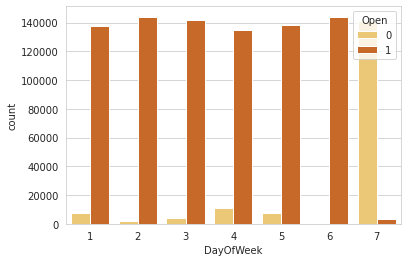

In [143]:
sns.countplot(x='DayOfWeek',hue='Open',data=Dataset,palette="YlOrBr")



In [144]:
print("As we can see that in the graph given below that Stores mainly closed on Sunday (open=1 and closed=0)")

As we can see that in the graph given below that Stores mainly closed on Sunday (open=1 and closed=0)


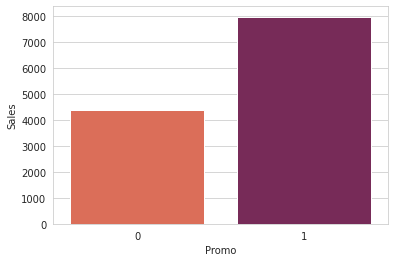

In [145]:
#Impact of promotion  on sales
Promo_sales = pd.DataFrame(Dataset.groupby('Promo').agg({'Sales':'mean'}))

sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'],palette="rocket_r")

In [146]:
print("Sales Are nearly doubled High When Promo is Running")

Sales Are nearly doubled High When Promo is Running


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


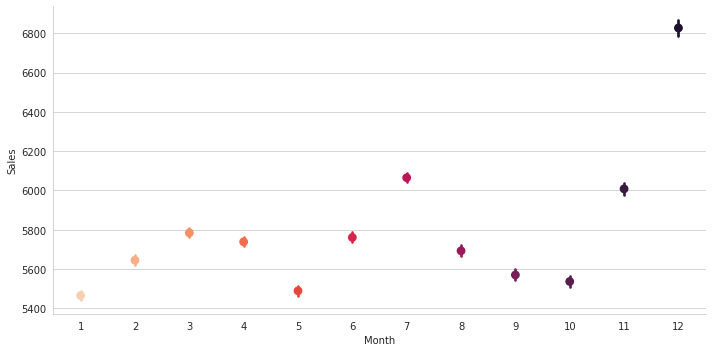

In [147]:
sns.factorplot(x="Month" ,y = "Sales" , data=Dataset, kind="point", aspect=2,size=5,palette="rocket_r")
# represent by Jan-1 to Dec-12)

In [148]:
print("As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas")

As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas


In [149]:
# SchoolHoliday 
Dataset.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

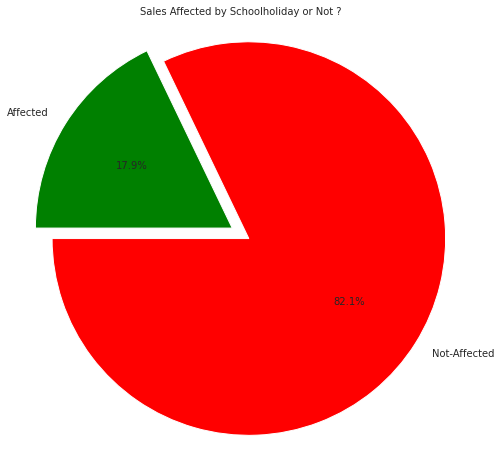

In [150]:
# we can understand the school holiday are affected on sales or not?????.)

labels = 'Not-Affected' , 'Affected'
sizes = Dataset.SchoolHoliday.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=10)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()


In [151]:
print("As we can see in the Piechart... Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday")

As we can see in the Piechart... Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday


In [152]:
#Transforming Variable StateHoliday

In [153]:
Dataset["StateHoliday"] = Dataset["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [154]:
Dataset.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [155]:
#Understand can state holiday affected on the sales?????? 

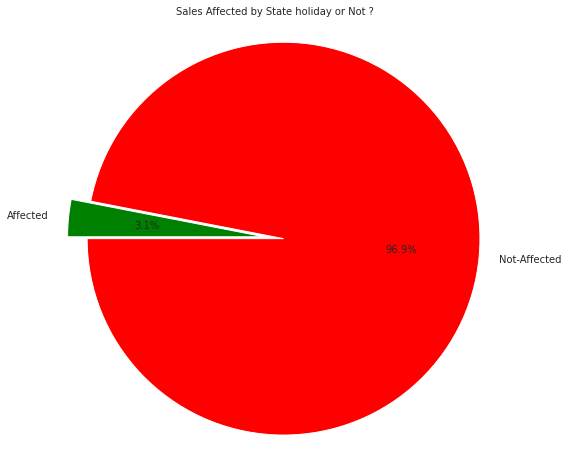

In [156]:
labels = 'Not-Affected' , 'Affected'
sizes = Dataset.StateHoliday.value_counts()
colors = ['red','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=10)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [157]:
print("As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday .As Sales isn't much affected by State Holiday so i'm removing this column")

As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday .As Sales isn't much affected by State Holiday so i'm removing this column


In [158]:
#Drop the columns in state Holiday
Dataset.drop('StateHoliday',inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


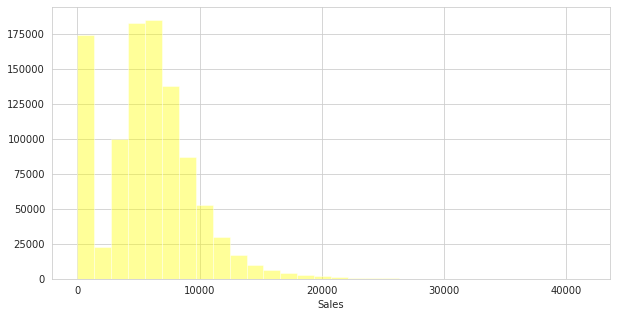

In [159]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.distplot(Dataset['Sales'], kde = False,bins=30,color='yellow');

In [160]:
print("Histogram Representation of Sales. Here 0 is showing because most of the time store was closed")

Histogram Representation of Sales. Here 0 is showing because most of the time store was closed


Sales VS Customer

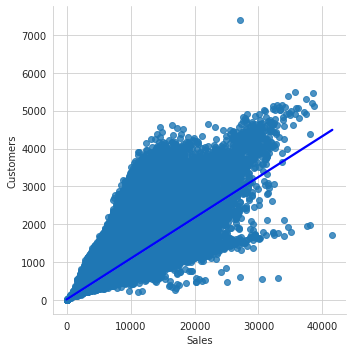

In [161]:
sns.lmplot(x= 'Sales' , y ='Customers',data=Dataset, palette='rocket_r', height=5,aspect=1, line_kws={'color':'blue'});

Second step is analysing store Data

In [162]:
store_data=pd.read_csv("/content/drive/MyDrive/dataset/store.csv")
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [163]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [164]:
store_data.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [165]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [166]:
store_data.shape

(1115, 10)

In [167]:
#Cheacking Missing value of store dataset
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [168]:
#High missing values columns are removed in store Dataset
store_data = store_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [169]:
#low persantages of missing values are replace midean()
store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.median(), inplace=True)

# so i am successfully clean the store Dataset.

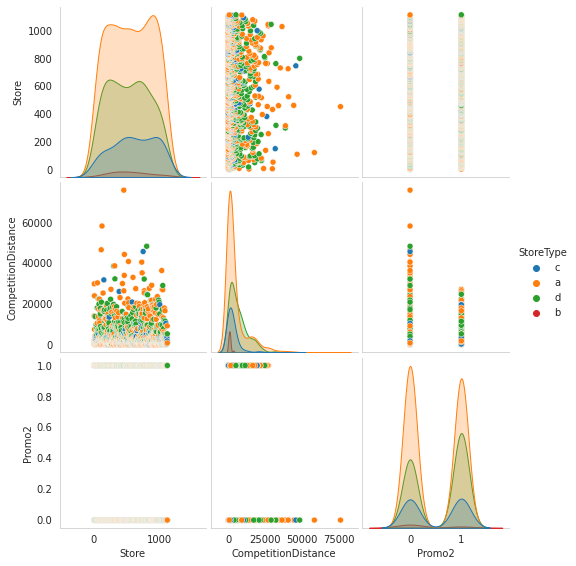

In [170]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
plot=sns.pairplot(store_data,hue='StoreType')
plot.fig.set_size_inches(8,8);

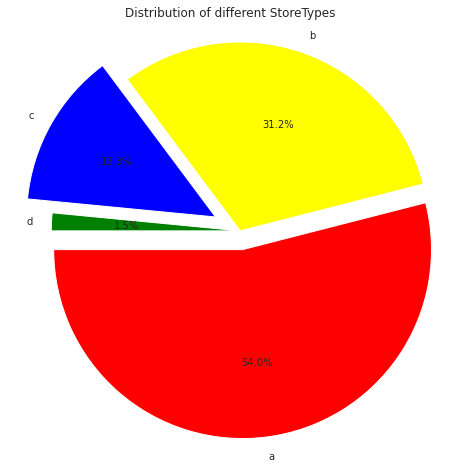

In [171]:
#Disribusion of different store type
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_data.StoreType.value_counts()
colors = ['red', 'yellow' , 'blue' , 'green']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()


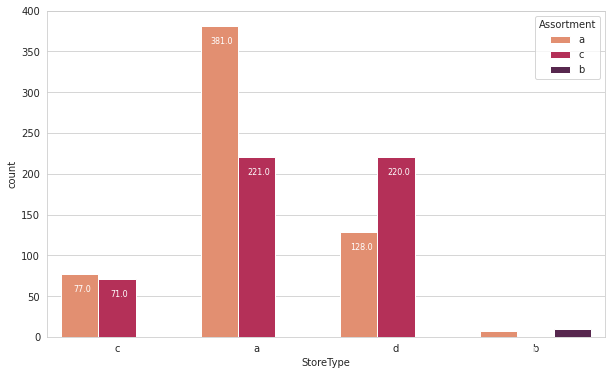

In [172]:
#Checking stores with their assortment type
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_data,palette="rocket_r")

for plot1 in store_type.patches:
    store_type.annotate(f'\n{plot1.get_height()}', (plot1.get_x()+0.15, plot1.get_height()),ha='center', va='top', color='white', size=8)

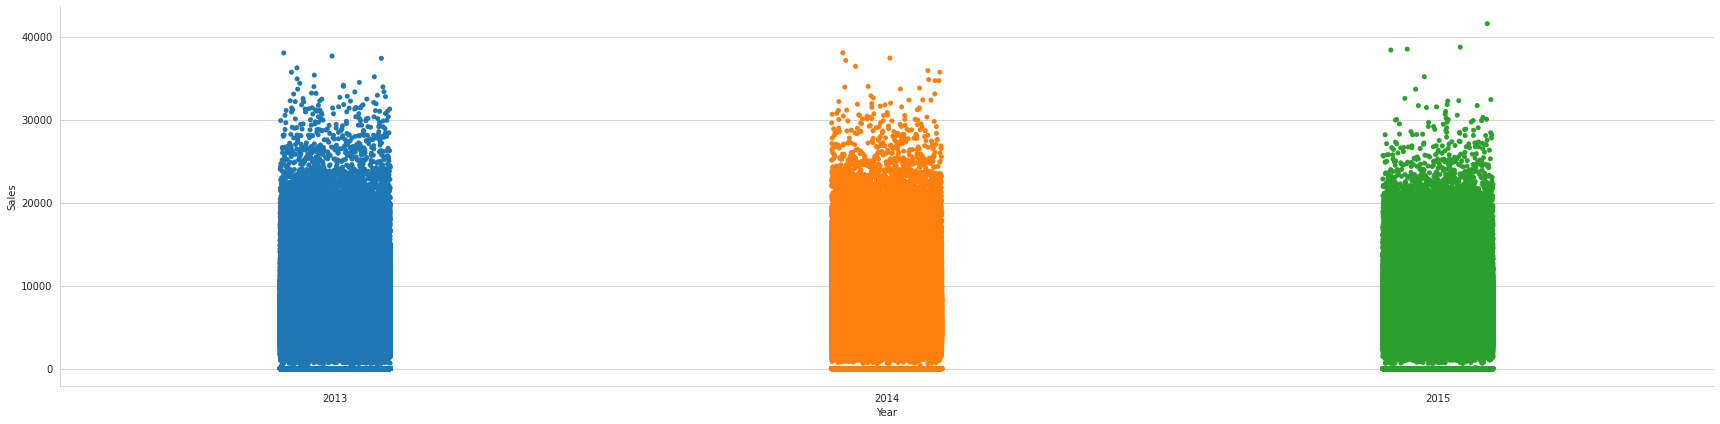

In [173]:
#We can see that there is not such significant differences in these 3 years in terms of sales
sns.catplot(x='Year',y='Sales',data=Dataset, height=6, aspect=4 );

### **Merging Two Datasets**

In [174]:
MD= pd.merge(Dataset,store_data, how='left', on='Store')
MD.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [175]:
#cheaking Shape of Merge datashape()
MD.shape

(1017209, 16)

In [176]:
#cheacking Top 5 Rows
MD.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [177]:
#cheacking last 5 Rows
MD.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
1017204,1111,2,2013-01-01,0,0,0,0,1,2013,1,1,1,a,a,1900.0,1
1017205,1112,2,2013-01-01,0,0,0,0,1,2013,1,1,1,c,c,1880.0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,2013,1,1,1,a,c,9260.0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,2013,1,1,1,a,c,870.0,0
1017208,1115,2,2013-01-01,0,0,0,0,1,2013,1,1,1,d,c,5350.0,1


In [178]:
#Discribe the merge dataset
MD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   SchoolHoliday        1017209 non-null  int64         
 8   Year                 1017209 non-null  int64         
 9   Month                1017209 non-null  int64         
 10  Day                  1017209 non-null  int64         
 11  WeekOfYear           1017209 non-null  int64         
 12  StoreType            1017209 non-null  object        
 1

In [179]:
#cheacking Missing value of present dataset
MD.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
Year                   0
Month                  0
Day                    0
WeekOfYear             0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

EDA of Merge Dataset 

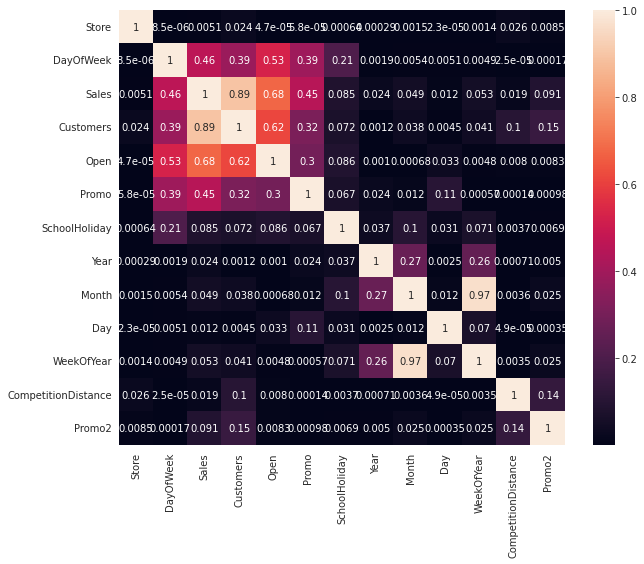

In [180]:
#heatmap of merge Dataset
plt.subplots(figsize=(10,8))
sns.heatmap(MD.corr().abs(), annot=True)
plt.savefig("heatmap.png")



In [181]:
MD["Avg_Customer_Sales"] = MD.Sales/MD.Customers

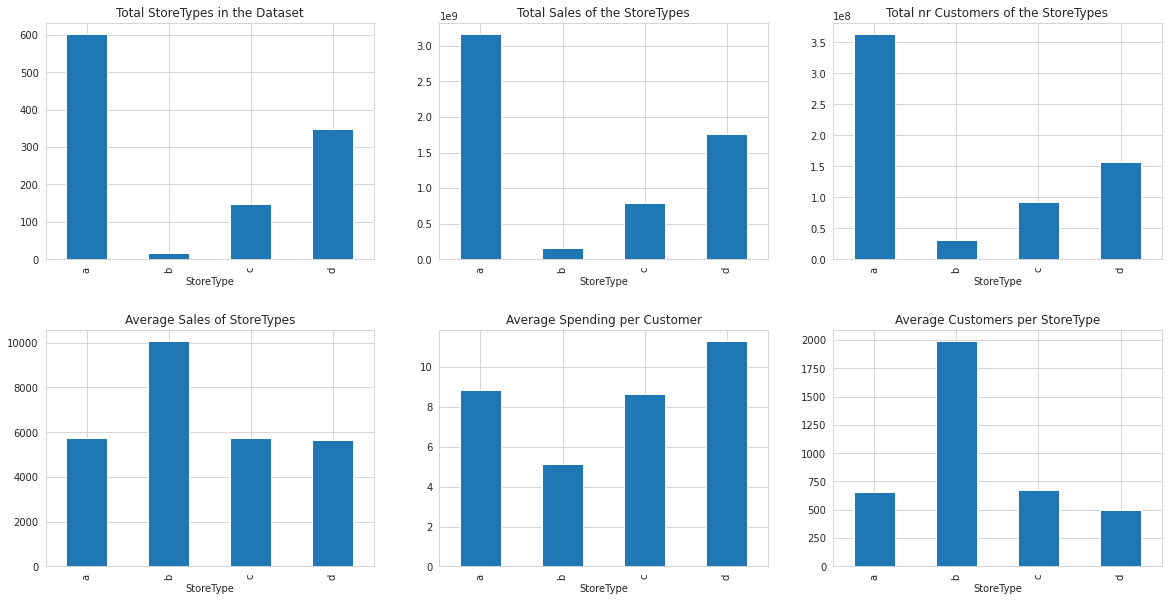

In [182]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_data.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
MD.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
MD.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
MD.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
MD.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
MD.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

In [183]:
print("As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.")

As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


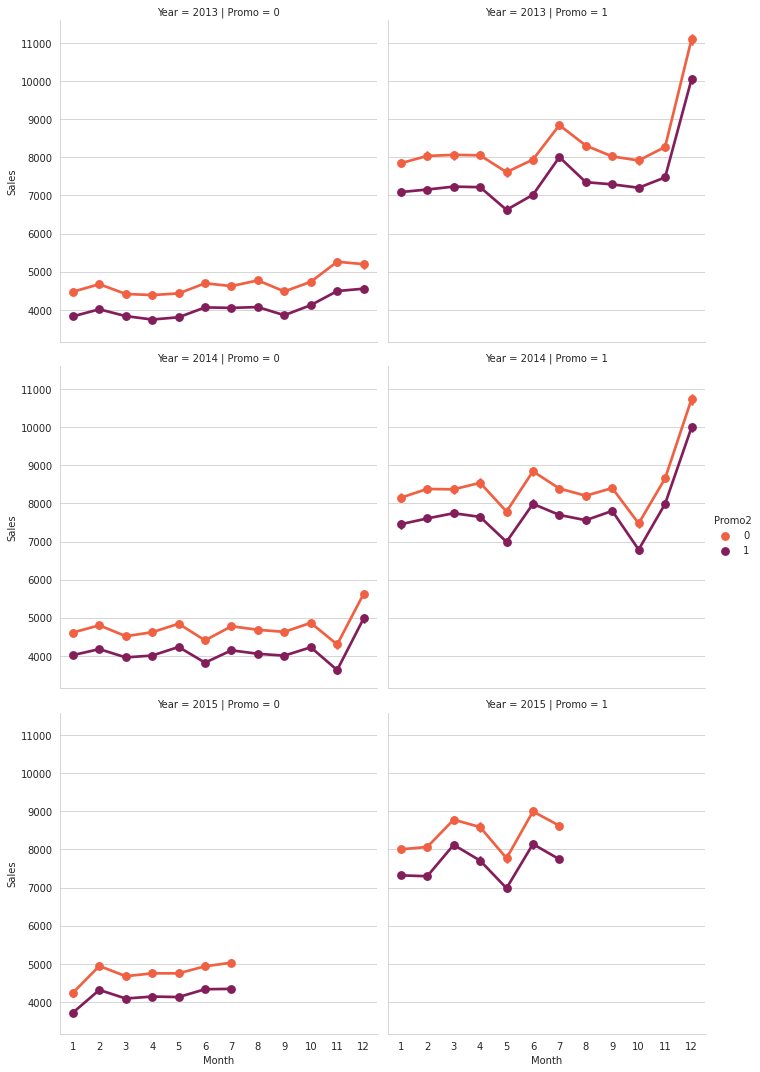

In [184]:
sns.factorplot(data = MD, x ="Month", y = "Sales", palette="rocket_r",
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )

In [185]:
print("So, of course, if the stores are having promotion the sells are higher.Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.")

So, of course, if the stores are having promotion the sells are higher.Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


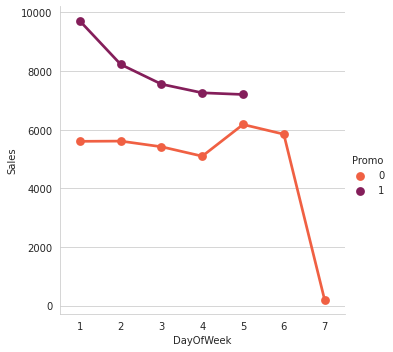

In [186]:
sns.factorplot(data = MD, x = "DayOfWeek", y = "Sales", hue = "Promo",palette="rocket_r")

In [187]:
print("As We can see that when the promo is running Sales are high.So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. The Sales are going crazy on Sunday. No wonder.")

As We can see that when the promo is running Sales are high.So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. The Sales are going crazy on Sunday. No wonder.


# **Conclusion of the analysis:**
 
**Sales are highly correlated to number of Customers.**
 
**The most selling and crowded store type is A.**
 
**StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**
 
**StoreTybe D had the highest buyer cart.**
 
**Promo runs only in weekdays.**
 
**For all stores, Promotion leads to increase in Sales and Customers both.**
 
**More stores are opened during School holidays than State holidays.**
 
**The stores which are opened during School Holiday have more sales than normal days.**
 
**Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.**
 
**Promo2 doesnt seems to be correlated to any significant change in the sales amount.**
 
**Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.**

### **Drop Subsets Of Data Where Might Cause Bias**


In [188]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
MD = MD[MD.Open != 0]

# Open isn't a variable anymore, so we'll drop it too
MD = MD.drop('Open', axis=1)
# Check if there's any opened store with zero sales
MD[MD.Sales == 0]['Store'].sum()
# see the percentage of open stored with zero sales
MD[MD.Sales == 0]['Sales'].sum()/MD.Sales.sum()
# remove this part of data to avoid bias
MD = MD[MD.Sales != 0]
MD_new=MD.copy()


In [189]:
MD_new = pd.get_dummies(MD_new,columns=['StoreType','Assortment'])

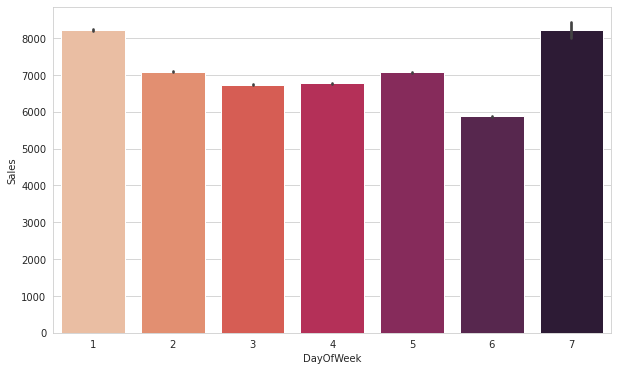

In [190]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(10,6))
sns.barplot(x='DayOfWeek', y='Sales' ,data=MD_new,palette="rocket_r"); 

In [191]:
#Setting Features and Target Variables
X = MD_new.drop(['Sales','Store','Date','Year'] , axis = 1)
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,Avg_Customer_Sales,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,9.482883,0,0,1,0,1,0,0
1,5,625,1,1,7,31,31,570.0,1,9.702400,1,0,0,0,1,0,0
2,5,821,1,1,7,31,31,14130.0,1,10.126675,1,0,0,0,1,0,0
3,5,1498,1,1,7,31,31,620.0,0,9.342457,0,0,1,0,0,0,1
4,5,559,1,1,7,31,31,29910.0,0,8.626118,1,0,0,0,1,0,0


In [192]:
X.shape

(844338, 17)

In [193]:
y= MD_new.Sales
y.head()


0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [194]:
y.shape

(844338,)

In [195]:
#split the Merge_Dataset :
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=6)


In [196]:
X_train

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,Avg_Customer_Sales,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
297773,1,416,0,1,10,27,44,4330.0,1,11.394231,0,0,0,1,0,0,1
795439,4,532,1,0,7,18,29,5740.0,1,13.167293,0,0,0,1,0,0,1
243164,3,532,0,1,12,24,52,3150.0,0,8.201128,1,0,0,0,1,0,0
150888,3,575,1,0,3,18,12,13620.0,1,9.899130,1,0,0,0,0,0,1
246783,6,891,0,0,12,20,51,8050.0,1,11.879910,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235203,5,609,0,1,1,2,1,13190.0,1,9.238095,1,0,0,0,0,0,1
953787,2,766,0,0,2,26,9,270.0,1,7.836815,1,0,0,0,1,0,0
922016,3,1129,1,1,3,27,13,3780.0,1,11.639504,0,0,0,1,1,0,0
997067,6,1454,0,0,1,19,3,420.0,0,6.783356,0,0,1,0,1,0,0


In [197]:
X_train.shape


(506602, 17)

In [198]:
X_test.shape


(337736, 17)

### **Implementing  Machine Learning Model**
1. Linear Regression
2. LARS Lasso Regression
3. Decision Tree Regression
4. Random Forest

**Linear Regression :**

In [199]:
#Fistly Scale the Data using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [200]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [201]:
#Train MOdel of linear Regression:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [202]:
#cheacing y-intercept on this model
model.intercept_

8893857237649544.0

In [203]:
#cheake coefficient
model.coef_

array([-1.66466155e+02,  4.33523827e+04,  2.39029397e+02,  9.51830061e+00,
        1.09200093e+02,  1.64463284e+01, -4.99306566e+00,  1.15417072e+02,
       -1.60831916e+02,  4.20903524e+04, -6.33182485e+14, -6.33182485e+14,
       -6.33182485e+14, -6.33182485e+14, -8.26067475e+15, -8.26067475e+15,
       -8.26067475e+15])

In [204]:
#test the linear  Regression model
y_pred_train = model.predict(X_train)

y_pred = model.predict(X_test)

In [205]:
mean_squared_error(y_test, y_pred)

573373.5891347087

In [206]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

757.214361416045

In [207]:
#Checked Train Score
LinearRegression_train_score=model.score(X_train,y_train)
LinearRegression_train_score

0.9407624885169805

In [208]:
#Checked Test Score
LinearRegression_test_score=model.score(X_test,y_test)
LinearRegression_test_score


0.9405188463467887

In [209]:
#storing 100 observations for analysis
perd_result = y_pred[:100]
Real_value = y_test[:100]
 

In [210]:
#storing these values into dataframe
Datasets= pd.DataFrame({'Real':Real_value,'PredictedLR':perd_result})

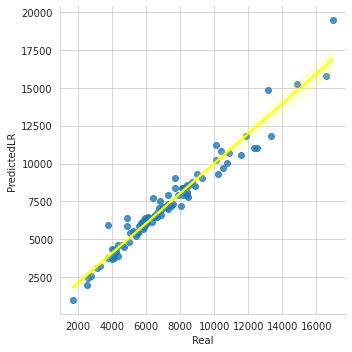

In [211]:
#Visulization Our prediction on sebon lib.
sns.lmplot(x='Real', y='PredictedLR', data=Datasets, line_kws={'color': 'yellow'});


In [212]:
from sklearn.metrics import mean_squared_error
import math

In [213]:
#Root Mean Square Error (RMSE)
y_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
#Treaning RMSE
from sklearn.metrics import mean_squared_error
import math
Train_RMSE=mean_squared_error(y_train, y_predicted)
#Test_RMSE
Test_RMSE=mean_squared_error(y_test, y_test_predicted)

In [214]:
# Mean Absolute percentage error(MAPE)
from sklearn.metrics import mean_absolute_percentage_error

Training_MAPE=mean_absolute_percentage_error(y_train, y_predicted)
Testing_MAPE=mean_absolute_percentage_error(y_test, y_test_predicted)

In [215]:
print("Linear_R_model_conclusion")

print("Linear_R_model_Score-->>>", LinearRegression_train_score)

print("Linear_R_model_Sample_test score-->>>", LinearRegression_test_score)

print("Root MEan Squar Error ")
print("Train_RMSE --->>>" ,Train_RMSE , "Test_RMSE --->>>", Test_RMSE)

print("Mean Absolute percentage error (MAPE) ")
print("Train_MAPE --->>>" ,Training_MAPE , "Test_MAPE --->>>", Testing_MAPE)
      

Linear_R_model_conclusion
Linear_R_model_Score-->>> 0.9407624885169805
Linear_R_model_Sample_test score-->>> 0.9405188463467887
Root MEan Squar Error 
Train_RMSE --->>> 570439.8485694885 Test_RMSE --->>> 573373.5891347087
Mean Absolute percentage error (MAPE) 
Train_MAPE --->>> 0.06843341999997476 Test_MAPE --->>> 0.06868939986477175


**LARS Lasso Regression :**

In [216]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True)



In [217]:
#Train MOdel of Lasso Regression:
lasso_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(normalize=True)

In [218]:
#cheacing y-intercept on this model
lasso_reg.intercept_

1605.3336182139155

In [219]:
#cheake coefficient
lasso_reg.coef_

array([   -0.        , 27271.22356417,     0.        ,     0.        ,
           0.        ,    -0.        ,     0.        ,     0.        ,
          -0.        , 14716.57143049,    -0.        ,    -0.        ,
          -0.        ,     0.        ,    -0.        ,    -0.        ,
           0.        ])

In [220]:
#Checked Train Score
LassoR_train_score=lasso_reg.score(X_train,y_train)
LassoR_train_score

0.7521725153605543

In [221]:
#Checked Test Score
LassoR_test_score=lasso_reg.score(X_test,y_test)
LassoR_test_score

0.7514805019619203

In [222]:
#Root Mean Square Error (RMSE)
y_predicted = lasso_reg.predict(X_train)
y_test_predicted = lasso_reg.predict(X_test)
#Treaning RMSE

Train_RMSE_LR=mean_squared_error(y_train, y_predicted)
#Test_RMSE
Test_RMSE_LR=mean_squared_error(y_test, y_test_predicted)

# Mean Absolute percentage error(MAPE)


Training_MAPE_LR=mean_absolute_percentage_error(y_train, y_predicted)
Testing_MAPE_LR=mean_absolute_percentage_error(y_test, y_test_predicted)

In [223]:
print("Lasso_R_model_conclusion")

print("Lasso_R_model_Score-->>>", LassoR_train_score)

print("Linear_R_model_Sample_test score-->>>", LassoR_test_score)

print("Root MEan Squar Error ")
print("Train_RMSE --->>>" ,Train_RMSE_LR , "Test_RMSE --->>>", Test_RMSE_LR)

print("Mean Absolute percentage error (MAPE) ")
print("Train_MAPE --->>>" ,Training_MAPE_LR , "Test_MAPE --->>>", Testing_MAPE_LR)
      

Lasso_R_model_conclusion
Lasso_R_model_Score-->>> 0.7521725153605543
Linear_R_model_Sample_test score-->>> 0.7514805019619203
Root MEan Squar Error 
Train_RMSE --->>> 2386505.936354313 Test_RMSE --->>> 2395624.627437886
Mean Absolute percentage error (MAPE) 
Train_MAPE --->>> 0.1916114432081867 Test_MAPE --->>> 0.19134833760235753


**Decision Tree Regression**

In [224]:
#Train MOdel of Decision Tree Regression:
tree = DecisionTreeRegressor()
tree_reg = tree.fit(X_train, y_train)

In [225]:
#Checked Train Score
DTR_train_score=tree_reg.score(X_train,y_train)
DTR_train_score

1.0

In [226]:
#Checked Test Score
DTR_test_score=tree_reg.score(X_test,y_test)
DTR_test_score

0.9995839250787935

In [227]:
#Root Mean Square Error (RMSE)
y_predicted = tree.predict(X_train)
y_test_predicted = tree.predict(X_test)
#Treaning RMSE

Train_RMSE_Tree=mean_squared_error(y_train, y_predicted)
#Test_RMSE
Test_RMSE_Tree=mean_squared_error(y_test, y_test_predicted)

# Mean Absolute percentage error(MAPE)

Training_MAPE_Tree=mean_absolute_percentage_error(y_train, y_predicted)
Testing_MAPE_Tree=mean_absolute_percentage_error(y_test, y_test_predicted)

In [236]:
print("Decision Tree Regression_model_conclusion")

print("Decision Tree Regression_model_Score-->>>", DTR_train_score)

print("Decision Tree Regression_model_Sample_test score-->>>", DTR_test_score)

print("Root MEan Squar Error ")
print("Train_Decision Tree Regression --->>>" ,Train_RMSE_Tree , "Test_RMSE --->>>", Test_RMSE_Tree)

print("Mean Absolute percentage error (MAPE) ")
print("Train_Decision Tree Regression --->>>" ,Training_MAPE_Tree , "Test_MAPE --->>>", Testing_MAPE_Tree)

Decision Tree Regression_model_conclusion
Decision Tree Regression_model_Score-->>> 1.0
Decision Tree Regression_model_Sample_test score-->>> 0.9995839250787935
Root MEan Squar Error 
Train_Decision Tree Regression --->>> 0.0 Test_RMSE --->>> 4010.7892377478265
Mean Absolute percentage error (MAPE) 
Train_Decision Tree Regression --->>> 0.0 Test_MAPE --->>> 0.0022376776007860684


**Random Forest**

In [229]:
RDF = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = RDF.fit(X_train, y_train)


In [230]:
#Checked Train Score
RDF_train_score=rdfreg.score(X_train,y_train)
RDF_train_score

0.9999795149579371

In [231]:
#Checked Test Score
RDF_test_score=rdfreg.score(X_test,y_test)
RDF_test_score

0.9998120687376748

In [232]:
#Root Mean Square Error (RMSE)
y_predicted = rdfreg.predict(X_train)
y_test_predicted = rdfreg.predict(X_test)
#Treaning RMSE

Train_RMSE_rdfreg=mean_squared_error(y_train, y_predicted)
#Test_RMSE
Test_RMSE_rdfreg=mean_squared_error(y_test, y_test_predicted)

# Mean Absolute percentage error(MAPE)

Training_MAPE_rdfreg=mean_absolute_percentage_error(y_train, y_predicted)
Testing_MAPE_rdfreg=mean_absolute_percentage_error(y_test, y_test_predicted)

In [239]:
print("Random Forest_model_conclusion")

print("Random Forest_model_Score-->>>", RDF_train_score)

print("Random Forest_model_Sample_test score-->>>", RDF_test_score)

print("Root MEan Squar Error ")
print("Train_Random Forest --->>>" ,Train_RMSE_rdfreg , "Test_Random Forest RMSE --->>>", Test_RMSE_rdfreg)

print("Mean Absolute percentage error (MAPE) ")
print("Train_Random Forest --->>>" ,Training_MAPE_rdfreg , "Test_Random Forest MAPE --->>>", Testing_MAPE_rdfreg)

Random Forest_model_conclusion
Random Forest_model_Score-->>> 0.9999795149579371
Random Forest_model_Sample_test score-->>> 0.9998120687376748
Root MEan Squar Error 
Train_Random Forest --->>> 197.2649424286102 Test_Random Forest RMSE --->>> 1811.5792275697581
Mean Absolute percentage error (MAPE) 
Train_Random Forest --->>> 0.000307406587990983 Test_Random Forest MAPE --->>> 0.0007316462715106348


In [237]:
#conclusion

Conclusion = pd.DataFrame({'Train_Score':[LinearRegression_train_score,LassoR_train_score,DTR_train_score,RDF_train_score],'Test_Score':[LinearRegression_test_score,LassoR_test_score,DTR_test_score,RDF_test_score]},index=['Linear Regression','Lasso Regression','Decision Tree','Random Forest'])

In [238]:
Conclusion

,Train_Score,Test_Score
Linear Regression,0.940762,0.940519
Lasso Regression,0.752173,0.751481
Decision Tree,1.000000,0.999584
Random Forest,0.999980,0.999812
